## 시험준비

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import sklearn
import sklearn.linear_model
import matplotlib.pyplot as plt

1. True or False

> True인지 False인지 적기만 하면 됨. 설명 필요 없음. (최대한 신속하고 정확하게 해야될 듯) 50문항 정도, 잘 읽고 True면 1, False면 0이게 하고, 길이가 50인 리스트로 정리할 것. 그리고 Kaggle Competition에 제출할 것.

> 다 0이라고 써놓고 적합할 수도 있음... ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 그냥 읽어보고 하는 게 더 빨라요~
>
> 1번에서는 50점을 맞을 수 있게 설계하는 게 목표입니당... kaggle 사용법을 확실하게 알아두는 게 목적
>
> 어차피 submission은 jupyter notebook file

In [6]:
df = pd.DataFrame({'submit' : [0,1,0,1,0,0,0]})
df.to_csv('submission.csv', index = False)  ## 아마 이게 되지 않을까...

,submit
0,0
1,1
2,0
3,1
4,0
5,0
6,0


2. 자료분석

> 지침에 맞게 자료를 해석하고 세부지침에 맞추어 분석

> 단순히 자료를 분석하는 것을 넘어, 전처리하고, 설명변수 간 상관관계를 분석하는 등...

In [41]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/icesales_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/icesales_test.csv')

In [4]:
df_train

,temp,type,sales
0,-4.1,choco,10.900261
1,-3.7,choco,14.002524
2,-3.7,vanilla,26.008644
3,-3.0,choco,15.928335
4,-1.3,vanilla,29.597396
...,...,...,...
155,14.7,vanilla,79.846568
156,15.0,choco,60.666163
157,15.0,vanilla,78.713140
158,15.2,choco,61.561043


> 설명변수인 온도(`temp`)와 아이스크림 종류(`type`)가 반응변수인 판매량(`sales`)에 미치는 영향을 알아보면 좋을 것 같다.

i) 시각화

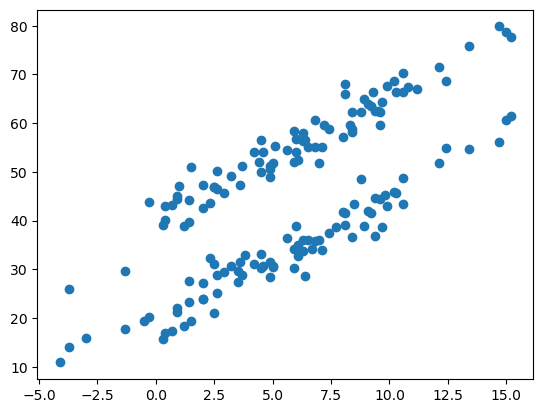

In [6]:
plt.plot(df_train.temp, df_train.sales, 'o')
plt.show()

In [9]:
set(df_train.type)

{'choco', 'vanilla'}

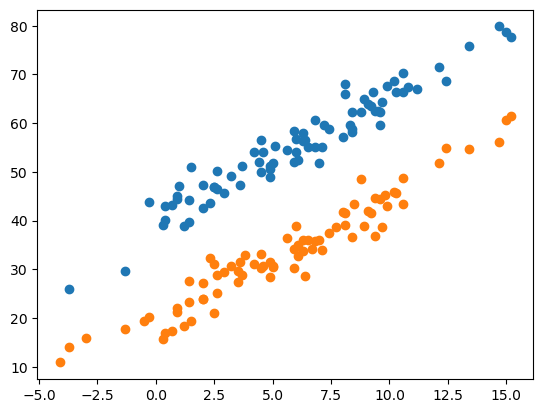

In [8]:
plt.plot(df_train.loc[df_train.type == 'vanilla'].temp, df_train.loc[df_train.type == 'vanilla'].sales, 'o')
plt.plot(df_train.loc[df_train.type != 'vanilla'].temp, df_train.loc[df_train.type != 'vanilla'].sales, 'o')

In [12]:
pd.get_dummies(df_train.drop('sales', axis = 1), drop_first = True).corr()

,temp,type_vanilla
temp,1.000000,0.062866
type_vanilla,0.062866,1.000000


> type에 포함된 두 개의 값은 계수에 영향을 미치는 것 같다.
>
> 교호작용은 존재하지 않는 것 같다.
>
> 따라서 그대로 선형회귀모형으로 적합한다.

In [13]:
## 1
X = pd.get_dummies(df_train.drop('sales', axis = 1), drop_first = True)
y = df_train.sales
XX = pd.get_dummies(df_test, drop_first = True)

## 2
predictr = sklearn.linear_model.LinearRegression()

## 3
predictr.fit(X, y)

## 4
df_train = df_train.assign(sales_hat = predictr.predict(X))

In [14]:
predictr.score(X, y)

0.9653291998415298

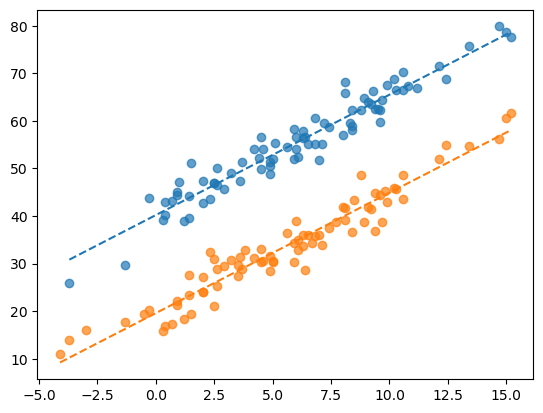

In [17]:
plt.plot(df_train.loc[df_train.type == 'vanilla'].temp, df_train.loc[df_train.type == 'vanilla'].sales, 'o', alpha = 0.7)
plt.plot(df_train.loc[df_train.type != 'vanilla'].temp, df_train.loc[df_train.type != 'vanilla'].sales, 'o', alpha = 0.7)
plt.plot(df_train.loc[df_train.type == 'vanilla'].temp, df_train.loc[df_train.type == 'vanilla'].sales_hat, '--', color = 'C0')
plt.plot(df_train.loc[df_train.type != 'vanilla'].temp, df_train.loc[df_train.type != 'vanilla'].sales_hat, '--', color = 'C1')
plt.show()

> 언더라잉을 잘 설명하고 있는 것으로 판단된다.

In [18]:
df_test = df_test.assign(salse_hat = predictr.predict(XX)); df_test

,temp,type,salse_hat
0,-4.1,vanilla,29.813105
1,-3.0,vanilla,32.597520
2,-0.5,vanilla,38.925738
3,0.4,choco,20.595118
4,0.7,vanilla,41.963283
5,0.7,choco,21.354504
6,1.0,choco,22.113890
7,1.5,choco,23.379533
8,1.5,vanilla,43.988312
9,2.0,vanilla,45.253956


(2) 아래의 자료를 해석하고 세부지침에 맞추어 분석하라.

In [42]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_test.csv')

In [20]:
display(df_train.head())
display(df_test.head())

,X1,X2,X3,y
0,0.634499,4.562448,-0.593678,2.915723
1,-4.801602,2.924129,-0.057827,-3.339538
2,4.295305,5.086878,-0.353763,6.838744
3,-0.210203,5.994217,-0.833309,2.786905
4,0.063574,5.508144,-0.112174,2.817646


,X1,X2,X3
0,-5.188183,5.355068,0.373713
1,-3.994075,6.607599,0.070830
2,-6.130300,5.909246,-0.505089
3,2.260182,7.382222,0.442493
4,2.022601,4.495572,0.016306


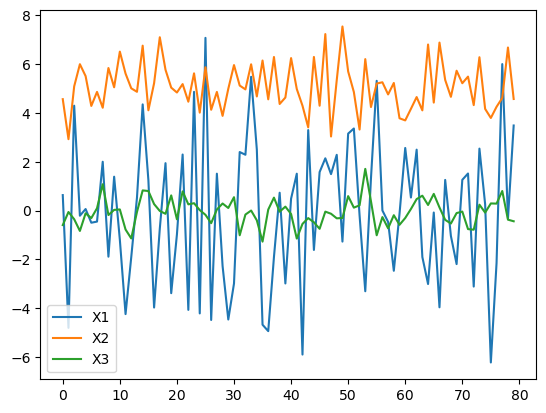

In [22]:
plt.plot(df_train.X1, label = 'X1')
plt.plot(df_train.X2, label = 'X2')
plt.plot(df_train.X3, label = 'X3')
plt.legend()
plt.show()

> 딱히 이상치는 발견되지 않으므로, StandardScaler로 scaling하겠다.

In [43]:
sclr = sklearn.preprocessing.StandardScaler()
X = pd.DataFrame(sclr.fit_transform(df_train.drop('y', axis = 1)), columns = df_test.columns)
y = df_train.y
XX = pd.DataFrame(sclr.fit_transform(df_test), columns = df_test.columns)

In [46]:
## 2
predictr = sklearn.linear_model.LinearRegression()

## 3
predictr.fit(X, y)

## 4
df_train.assign(predictr_hat = predictr.predict(X))

,X1,X2,X3,y,predictr_hat
0,0.634499,4.562448,-0.593678,2.915723,2.915723
1,-4.801602,2.924129,-0.057827,-3.339538,-3.339538
2,4.295305,5.086878,-0.353763,6.838744,6.838744
3,-0.210203,5.994217,-0.833309,2.786905,2.786905
4,0.063574,5.508144,-0.112174,2.817646,2.817646
...,...,...,...,...,...
75,-6.219542,3.792796,0.292863,-4.323144,-4.323144
76,-2.149834,4.250207,0.285560,-0.024730,-0.024730
77,5.999021,4.612754,0.801928,8.305398,8.305398
78,-0.329489,6.677861,-0.371779,3.009442,3.009442


In [47]:
predictr.score(X, y)

1.0

In [49]:
predictr.coef_

array([2.95668797e+00, 4.92609652e-01, 5.09818192e-16])

> y와 predictr_hat의 값이 완전 동일한 것으로 보아, y는 기존 X1, X2, X3를 표준화한 것의 결합으로 이뤄진 것으로 추측된다.

In [50]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_test.csv')

In [51]:
## 1
X = df_train.drop('y', axis = 1)
y = df_train.y

## 2
predictr = sklearn.linear_model.LinearRegression()

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

1.0

In [54]:
predictr.coef_

array([ 1.000000e+00,  5.000000e-01, -3.431502e-16])

In [53]:
df_train.assign(y_hat = predictr.predict(X))

,X1,X2,X3,y,y_hat
0,0.634499,4.562448,-0.593678,2.915723,2.915723
1,-4.801602,2.924129,-0.057827,-3.339538,-3.339538
2,4.295305,5.086878,-0.353763,6.838744,6.838744
3,-0.210203,5.994217,-0.833309,2.786905,2.786905
4,0.063574,5.508144,-0.112174,2.817646,2.817646
...,...,...,...,...,...
75,-6.219542,3.792796,0.292863,-4.323144,-4.323144
76,-2.149834,4.250207,0.285560,-0.024730,-0.024730
77,5.999021,4.612754,0.801928,8.305398,8.305398
78,-0.329489,6.677861,-0.371779,3.009442,3.009442


In [55]:
## 1
sclr = sklearn.preprocessing.MinMaxScaler()
X = sclr.fit_transform(df_train.drop('y', axis = 1))
y = df_train.y

## 2
predictr = sklearn.linear_model.LinearRegression()

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

1.0

In [56]:
df_train.assign(y_hat = predictr.predict(X))

,X1,X2,X3,y,y_hat
0,0.634499,4.562448,-0.593678,2.915723,2.915723
1,-4.801602,2.924129,-0.057827,-3.339538,-3.339538
2,4.295305,5.086878,-0.353763,6.838744,6.838744
3,-0.210203,5.994217,-0.833309,2.786905,2.786905
4,0.063574,5.508144,-0.112174,2.817646,2.817646
...,...,...,...,...,...
75,-6.219542,3.792796,0.292863,-4.323144,-4.323144
76,-2.149834,4.250207,0.285560,-0.024730,-0.024730
77,5.999021,4.612754,0.801928,8.305398,8.305398
78,-0.329489,6.677861,-0.371779,3.009442,3.009442


> 어떠한 방법으로 분석해도 값이 똑같은 것으로 보아, 애초에 y는 X1,X2,X3들의 결합으로 만들어졌다는 것을 알 수 있다.(근데 애초에 결합이면 값이 똑같아야 하긴 함)

In [57]:
df_test = df_test.assign(y_hat = predictr.predict(XX))
df_test

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,X1,X2,X3,y_hat
0,-5.188183,5.355068,0.373713,-30.058336
1,-3.994075,6.607599,0.070830,-21.989056
2,-6.130300,5.909246,-0.505089,-33.243408
3,2.260182,7.382222,0.442493,8.341058
4,2.022601,4.495572,0.016306,1.295547
5,-0.782962,4.982181,0.001587,-10.589660
6,1.551188,4.832754,-0.381172,-0.174666
7,0.272891,6.183472,0.180807,-3.261218
8,0.792528,5.357520,0.499754,-2.577599
9,0.621078,3.009435,0.155958,-8.208445


3. 연구

(1) 아래 자료를 세부지침에 맞추어 연구하라.

In [2]:
np.random.seed(43052)
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)

In [3]:
df.head()

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
0,1.784955,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200,136.026566,141.793547,...,132.014696,140.013265,135.575816,143.863346,152.162740,132.850033,115.956496,131.842126,125.090801,143.568527
1,10.789671,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482,927.469901,952.424087,...,942.251184,923.241548,939.924802,921.912261,953.250300,931.743615,940.205853,930.575825,941.530348,934.221055
2,8.221213,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942,493.321602,490.059102,...,484.438233,488.101275,485.626742,475.330715,485.147363,468.553780,486.870976,481.640957,499.340808,488.197332
3,2.137594,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321,57.166824,67.834920,...,67.653225,65.710588,64.146780,76.662194,66.837839,82.379018,69.174745,64.475993,52.647087,59.493275
4,8.650144,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100,434.761142,443.135269,...,455.940348,435.952854,441.521145,443.038886,433.118847,466.103355,430.056944,423.632873,446.973484,442.793633


In [4]:
## 1
X = df.drop('employment_score', axis = 1)
y = df.employment_score

In [5]:
## 2
predictrs = [sklearn.linear_model.Lasso(alpha = alpha) for alpha in np.linspace(0.1, 2, 20)]

In [6]:
## 3
for predictr in predictrs :
    predictr.fit(X, y)

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+02, tolerance: 4.845e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.467e+02, tolerance: 4.845e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

In [7]:
score_list = [predictr.score(X, y) for predictr in predictrs]; score_list

[0.9600005576046684,
 0.9512287584487535,
 0.940041433183524,
 0.9283670887878276,
 0.9162773967468533,
 0.9049017495895855,
 0.8935056936142943,
 0.881669428828109,
 0.8693514019464846,
 0.856518712711254,
 0.8427221701303997,
 0.8282809351442951,
 0.8127448502595311,
 0.7960336383436618,
 0.7784060569355347,
 0.7596022192030264,
 0.7526313102752085,
 0.7526305473493542,
 0.7526297561690184,
 0.7526289367878207]

In [8]:
scores = pd.Series(score_list)
scores.index = np.linspace(0.1, 2, 20)
scores.reset_index()

,index,0
0,0.1,0.960001
1,0.2,0.951229
2,0.3,0.940041
3,0.4,0.928367
4,0.5,0.916277
5,0.6,0.904902
6,0.7,0.893506
7,0.8,0.881669
8,0.9,0.869351
9,1.0,0.856519


In [9]:
scores.reset_index().rename({'index' : 'alpha', 0 : 'train score'}, axis = 1)

,alpha,train score
0,0.1,0.960001
1,0.2,0.951229
2,0.3,0.940041
3,0.4,0.928367
4,0.5,0.916277
5,0.6,0.904902
6,0.7,0.893506
7,0.8,0.881669
8,0.9,0.869351
9,1.0,0.856519


In [10]:
[(predictr.coef_ != 0).sum() for predictr in predictrs]

[431,
 321,
 232,
 175,
 123,
 89,
 64,
 50,
 37,
 29,
 26,
 21,
 18,
 15,
 13,
 12,
 10,
 10,
 10,
 10]

In [21]:
dataset = scores.reset_index().rename({'index' : 'alpha', 0 : 'train score'}, axis = 1).assign(Non_Zero_Intercept = [(predictr.coef_ != 0).sum() for predictr in predictrs])\
.rename({'Non_Zero_Intercept' : 'Non Zero Intercept'}, axis = 1); dataset

,alpha,train score,Non Zero Intercept
0,0.1,0.960001,431
1,0.2,0.951229,321
2,0.3,0.940041,232
3,0.4,0.928367,175
4,0.5,0.916277,123
5,0.6,0.904902,89
6,0.7,0.893506,64
7,0.8,0.881669,50
8,0.9,0.869351,37
9,1.0,0.856519,29


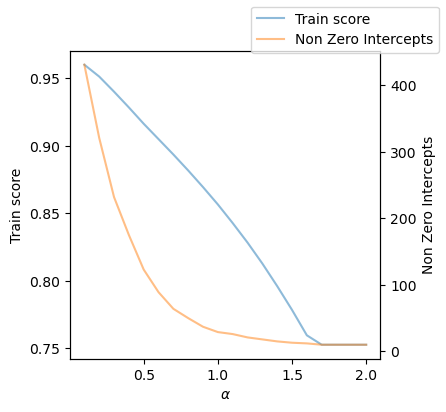

In [49]:
fig, ax1 = plt.subplots(1, figsize = (4,4))
ax1.plot(dataset.alpha, dataset['train score'], '-', color = 'C0', alpha = 0.5, label = 'Train score')
ax1.set_ylabel('Train score')
ax1.set_xlabel(r'$\alpha$')
ax2 = ax1.twinx()
ax2.plot(dataset.alpha, dataset['Non Zero Intercept'], '-', color = 'C1', alpha = 0.5, label = 'Non Zero Intercepts')
ax2.set_ylabel('Non Zero Intercepts')
fig.legend()
plt.show()

> alpha의 값이 커질수록 기울기가 0이 아닌 계수값들이 줄어드는 것을 볼 수 있다. 이는 Lasso가 몇 개의 설명변수만으로 기울기를 설명하도록 하여 공선성을 줄이는데, alpha값에 따라 이러한 패털티가 강화되기 때문이다.